In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
data = pd.read_csv('USArrests.csv', index_col = 0)
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


### PREPROCESSING THE DATA

In [54]:
data.head(3)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0


In [55]:
data.tail(3)

,Murder,Assault,UrbanPop,Rape
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [57]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### DATA VISUALISATIONS

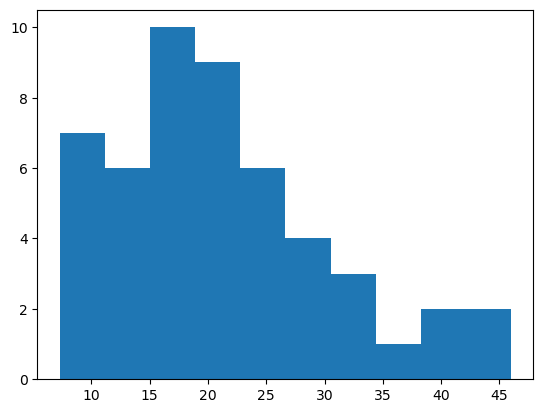

In [58]:
plt.hist(data['Rape'])
plt.show()

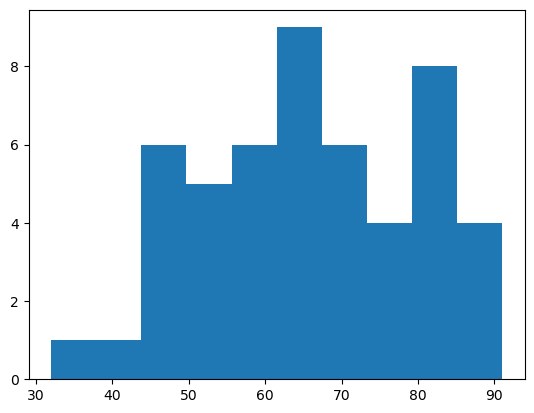

In [59]:
plt.hist(data['UrbanPop'])
plt.show()

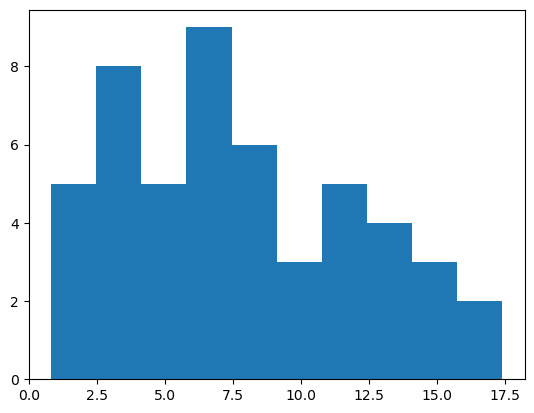

In [60]:
plt.hist(data['Murder'])
plt.show()

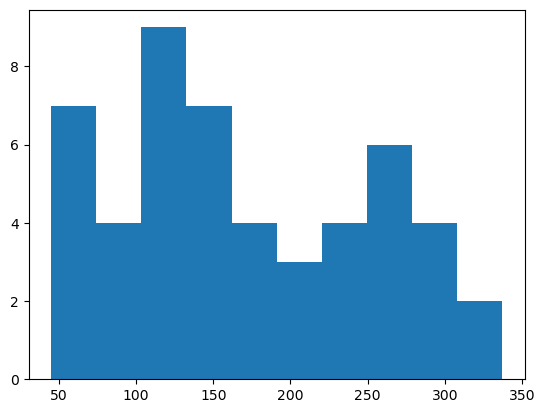

In [61]:
plt.hist(data['Assault'])
plt.show()

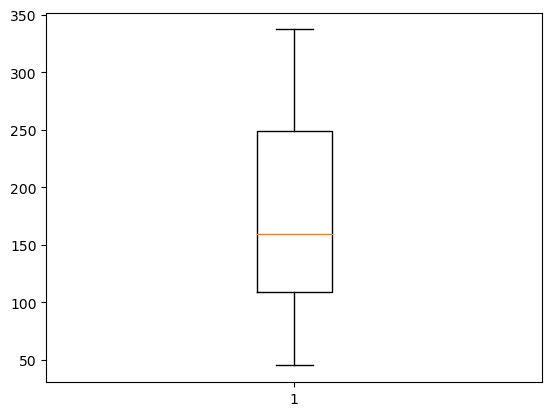

In [62]:
plt.boxplot(data['Assault'])
plt.show()

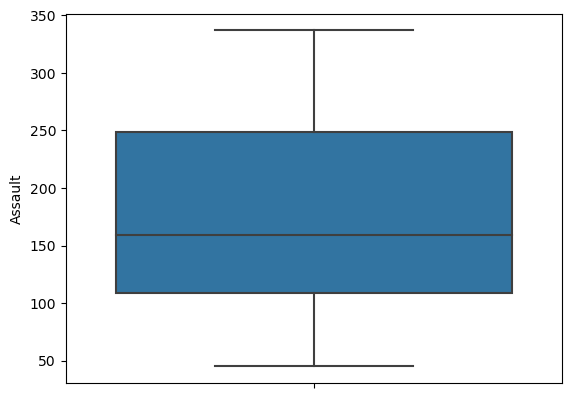

In [63]:
sns.boxplot(y = data['Assault'])
plt.show()

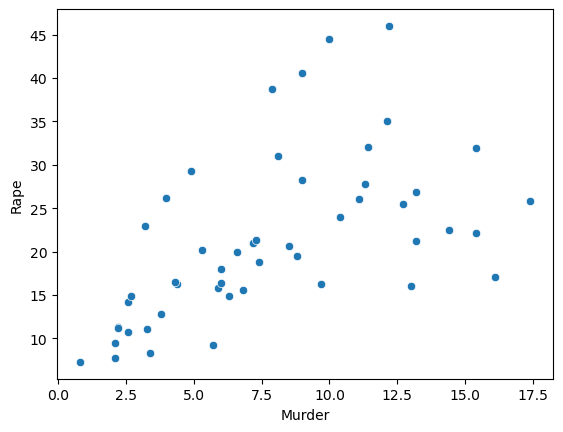

In [64]:
sns.scatterplot(x = "Murder", y = "Rape", data = data)
plt.show()

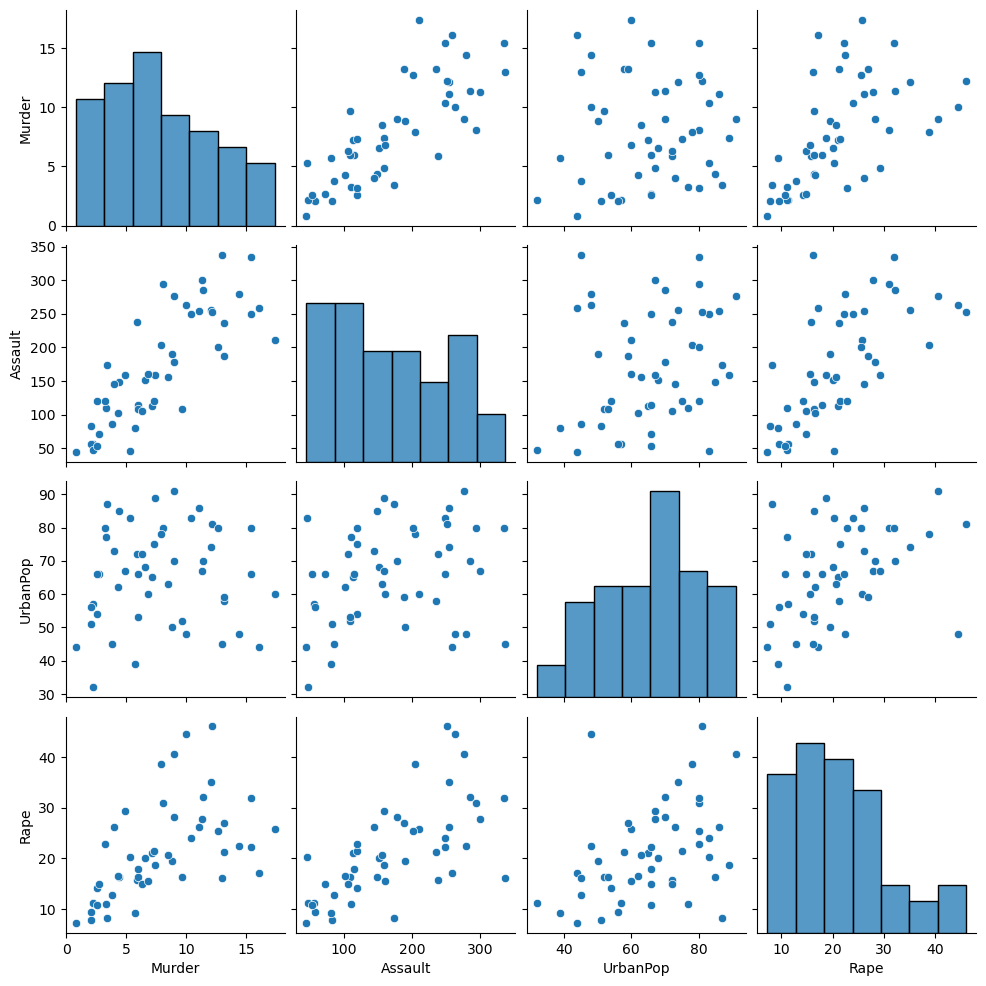

In [65]:
sns.pairplot(data)
plt.show()

In [66]:
data.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [67]:
x = data

### KMeans Clustering

In [68]:
from sklearn.cluster import KMeans

In [69]:
kmean_inst = KMeans(n_clusters=6)

In [70]:
kmean_inst.fit(x)

KMeans(n_clusters=6)

In [71]:
kmean_inst.inertia_

18768.000666666667

In [72]:
kmean_inst.cluster_centers_

array([[  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [ 11.95      , 316.5       ,  68.        ,  26.7       ],
       [ 11.76666667, 257.91666667,  68.41666667,  28.93333333],
       [ 11.5       , 195.33333333,  66.16666667,  27.43333333],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [  5.75      , 156.75      ,  74.        ,  19.4       ]])

In [73]:
kmean_inst.labels_

array([2, 2, 1, 3, 2, 3, 0, 2, 1, 3, 4, 0, 2, 0, 4, 0, 0, 2, 4, 1, 5, 2,
       4, 2, 3, 0, 0, 2, 4, 5, 2, 2, 1, 4, 0, 5, 5, 0, 5, 2, 4, 3, 3, 0,
       4, 5, 5, 4, 4, 5])

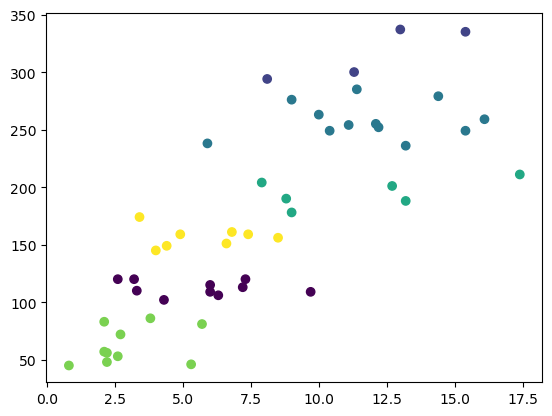

In [74]:
plt.scatter(data['Murder'], data['Assault'], c = kmean_inst.labels_)
plt.show()

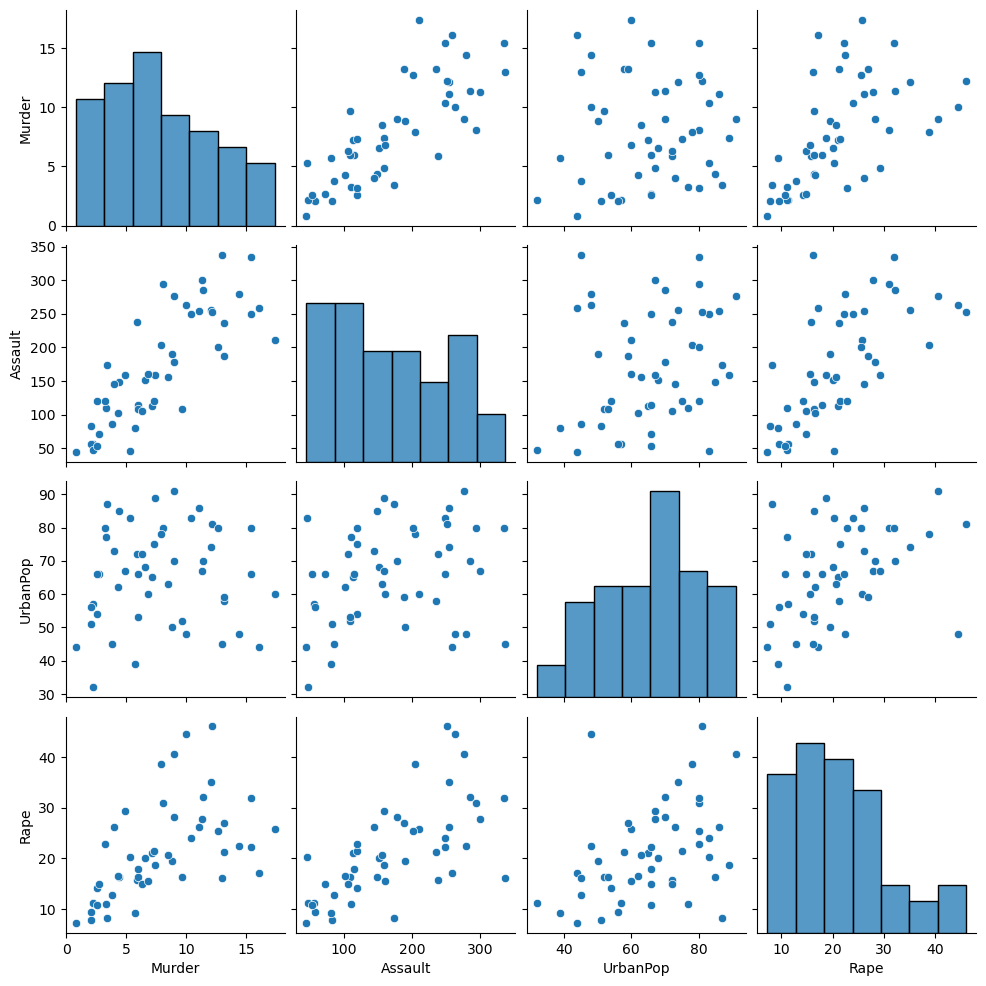

In [75]:
sns.pairplot(data)

### AgglomerativeClustering

In [101]:
from sklearn.cluster import AgglomerativeClustering

In [105]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(x)
agg_clusters


array([1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 1,
       0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 0, 0, 2, 0, 1, 0, 1, 1, 2,
       0, 0, 0, 0, 0, 0], dtype=int64)

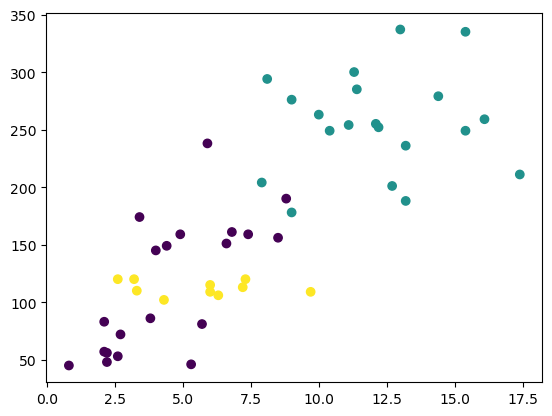

In [113]:
plt.scatter(data['Murder'], data['Assault'], c=agg_clusters)
plt.show()

### Applying PCA

In [114]:
from sklearn.decomposition import PCA

In [115]:
pc = PCA()

In [116]:
pc_arr = pc.fit_transform(data)

In [117]:
pc_arr.shape

(50, 5)

In [118]:
pc_data = pd.DataFrame(pc_arr)

In [119]:
# data

In [120]:
(pc.explained_variance_ratio_ * 100).round(1)

array([96.5,  2.8,  0.6,  0.1,  0. ])

In [121]:
pc_data.corr().round()

,0,1,2,3,4
0,1.0,-0.0,0.0,-0.0,0.0
1,-0.0,1.0,-0.0,-0.0,-0.0
2,0.0,-0.0,1.0,-0.0,-0.0
3,-0.0,-0.0,-0.0,1.0,0.0
4,0.0,-0.0,-0.0,0.0,1.0


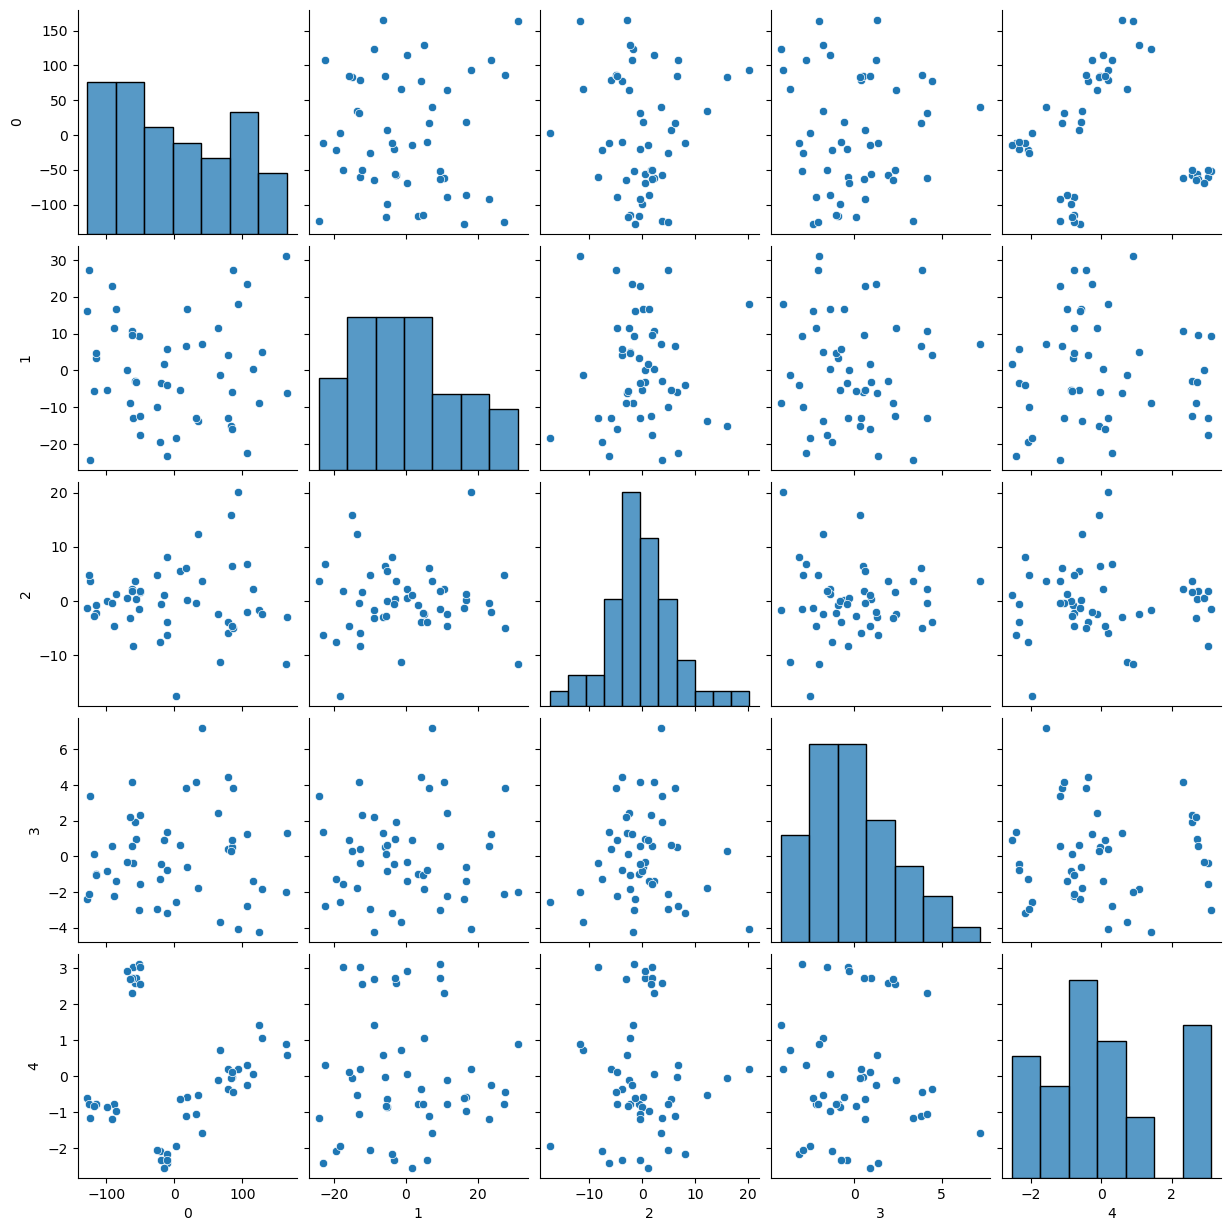

In [122]:
sns.pairplot(pc_data)

In [123]:
from sklearn.preprocessing import StandardScaler

In [124]:
km_labels = kmean_inst.labels_

In [125]:
data['km_clus_label'] = km_labels

In [126]:
sc = StandardScaler()
x = sc.fit_transform(data)

In [127]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

In [128]:
mergings = linkage(x , method = "average")

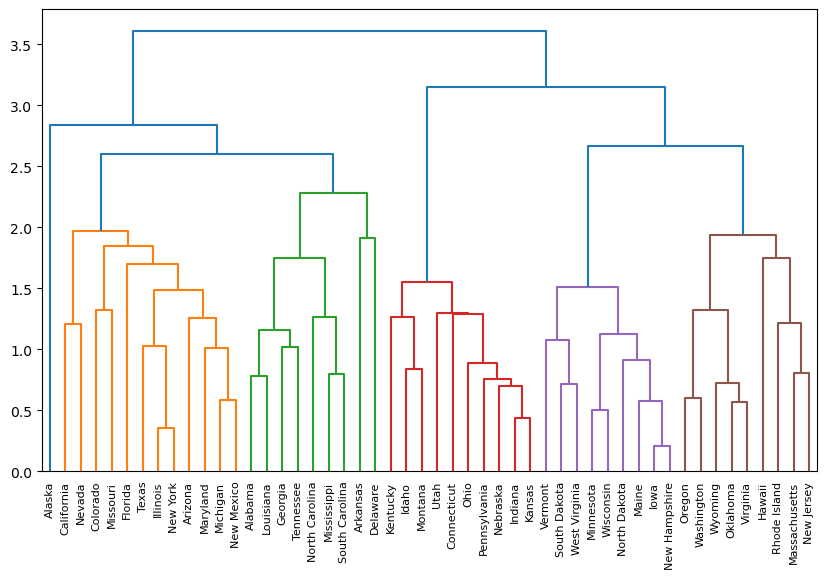

In [129]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = data.index)
plt.show()

### PERFORMING KMEANS AND AGGLOMERATIVE CLUSTERING

In [130]:
kmean_inst.fit(pc_data)

KMeans(n_clusters=6)

In [131]:
kmean_inst.inertia_

18851.698666666674

In [132]:
kmean_inst.cluster_centers_

array([[ 1.34190588e+02,  7.48048676e+00, -3.07842571e+00,
        -1.14937895e+00,  6.26698827e-01],
       [-1.37863615e+01, -8.82163450e+00, -2.72304071e+00,
        -1.11345074e+00, -2.22980874e+00],
       [-1.09021573e+02,  6.75150470e+00, -2.31026102e-01,
        -6.81649092e-01, -8.73421153e-01],
       [-5.84539710e+01, -2.77861403e+00, -7.24838369e-02,
         6.90379917e-01,  2.77541950e+00],
       [ 2.51029997e+01, -2.49203616e-01,  4.54440118e+00,
         2.23552945e+00, -9.14018913e-01],
       [ 8.29284809e+01, -1.25435296e+00,  1.60235722e+00,
         2.30339465e-01,  5.42407030e-02]])

In [133]:
kmean_inst.labels_

array([5, 5, 0, 4, 5, 4, 3, 5, 0, 4, 2, 3, 5, 3, 2, 3, 3, 5, 2, 0, 1, 5,
       2, 5, 4, 3, 3, 5, 2, 1, 0, 5, 0, 2, 3, 1, 1, 3, 1, 0, 2, 4, 4, 3,
       2, 1, 1, 2, 2, 1])

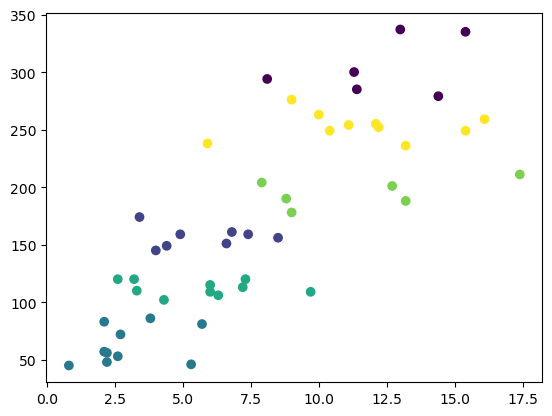

In [134]:
plt.scatter(data['Murder'], data['Assault'], c = kmean_inst.labels_)
plt.show()

In [135]:
agg_model = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_model.fit_predict(pc_data)
agg_clusters

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int64)

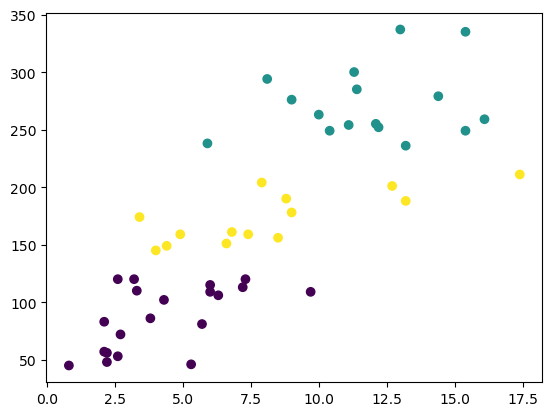

In [136]:
plt.scatter(data['Murder'], data['Assault'], c=agg_clusters)
plt.show()

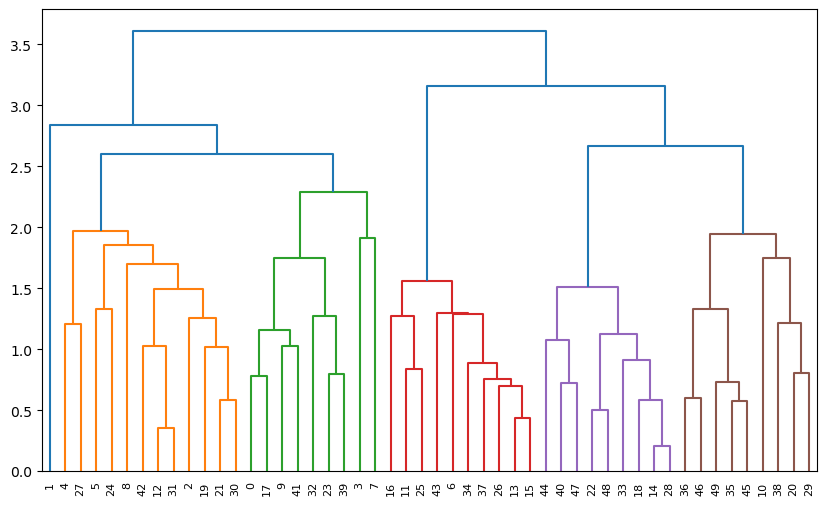

In [138]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = pc_data.index)
plt.show()

### With the application of PCA the clustering results of both MKeans and Heirarchial clustering methods have improved.